# Importação do banco de dados (*atualizado*)

In [5]:
#install.packages("readxl")
require(readxl)
bd<- read_excel("Analise heitor_02_10_21.xlsx",sheet = 2)
head(bd)
dim(bd) #72x40 (antes havia 71 variáveis)
str(bd)

Caidor,Genero,idade,Nivel_social,etnia,Nivel_educacional,Freq_atividade,Criterio_AHA,Anti_hipertensivo,betabloqueador,...,Dinamometria,Berg,STS,Flexibilidade_Ms,Flexibilidade_MI,TUG_sec,DT_Sec,DT_numero_animais,quantidade_total_de_medicação,medicaçao_tipo_cardiovascular
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
sim,mulher,76,b,branco,16,3x,c,não,sim,...,17.9,54,5,-29,-33,8.90,9.1,10,8,Beta + Anti_Coag
não,mulher,73,b,branco,16,3x,b,sim,sim,...,21.0,56,12,0,0,7.11,9.0,8,8,Beta + Anti_HAS
não,mulher,75,c,branco,12,2x,b,sim,sim,...,23.5,54,7,-7,-15,7.42,8.6,7,6,Beta + Anti_Coag
sim,mulher,83,b,branco,10,sedentario,c,sim,sim,...,15.3,51,9,-22,-4,10.52,11.9,7,8,Beta + Anti_Coag + Diu
não,mulher,83,a,branco,10,3x,c,sim,sim,...,16.7,56,NA,NA,-19,9.31,13.2,9,7,Beta + Anti_Coag + Diu
não,mulher,78,a,branco,12,2x,b,sim,sim,...,19.1,56,12,NA,0,7.17,8.7,6,4,Beta + Anti_HAS


[1] 72 40

tibble [72 x 40] (S3: tbl_df/tbl/data.frame)
 $ Caidor                       : chr [1:72] "sim" "não" "não" "sim" ...
 $ Genero                       : chr [1:72] "mulher" "mulher" "mulher" "mulher" ...
 $ idade                        : num [1:72] 76 73 75 83 83 78 83 82 78 75 ...
 $ Nivel_social                 : chr [1:72] "b" "b" "c" "b" ...
 $ etnia                        : chr [1:72] "branco" "branco" "branco" "branco" ...
 $ Nivel_educacional            : num [1:72] 16 16 12 10 10 12 20 8 14 16 ...
 $ Freq_atividade               : chr [1:72] "3x" "3x" "2x" "sedentario" ...
 $ Criterio_AHA                 : chr [1:72] "c" "b" "b" "c" ...
 $ Anti_hipertensivo            : chr [1:72] "não" "sim" "sim" "sim" ...
 $ betabloqueador               : chr [1:72] "sim" "sim" "sim" "sim" ...
 $ Anticoagulante_classif       : chr [1:72] "não" "não" "não" "sim" ...
 $ Diuretico_classif            : chr [1:72] "não" "não" "não" "sim" ...
 $ medicação_tipo_mental        : chr [1:72] "antidepres

# Pré-processamento dos dados

In [8]:
bd[] <- lapply(bd, as.factor) #Transforma todo o banco de dados em fator
bd[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")] <- lapply(bd[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")], as.numeric) 
str(bd) #Sim=2
table(bd$Caidor)
#Alterando a classe de referência (não -> sim)
bd <- within(bd, Caidor <- relevel(Caidor, ref = "sim"))

tibble [72 x 40] (S3: tbl_df/tbl/data.frame)
 $ Caidor                       : Factor w/ 2 levels "não","sim": 2 1 1 2 1 1 2 1 1 2 ...
 $ Genero                       : Factor w/ 2 levels "homem","mulher": 2 2 2 2 2 2 2 2 2 1 ...
 $ idade                        : num [1:72] 17 14 16 24 24 19 24 23 19 16 ...
 $ Nivel_social                 : Factor w/ 4 levels "a","b","c","d": 2 2 3 2 1 1 2 2 3 2 ...
 $ etnia                        : Factor w/ 2 levels "branco","preto": 1 1 1 1 1 1 2 1 1 1 ...
 $ Nivel_educacional            : num [1:72] 6 6 3 2 2 3 8 1 4 6 ...
 $ Freq_atividade               : Factor w/ 3 levels "2x","3x","sedentario": 2 2 1 3 2 1 2 1 1 1 ...
 $ Criterio_AHA                 : Factor w/ 2 levels "b","c": 2 1 1 2 2 1 2 1 1 2 ...
 $ Anti_hipertensivo            : Factor w/ 2 levels "não","sim": 1 2 2 2 2 2 1 1 1 2 ...
 $ betabloqueador               : Factor w/ 2 levels "não","sim": 2 2 2 2 2 2 2 1 2 2 ...
 $ Anticoagulante_classif       : Factor w/ 2 levels "não","sim": 


não sim 
 48  24 

## Removendo dados faltantes

In [10]:
table(bd$Caidor) #(24 sim e 48 não)
BD<- na.omit(bd) 
dim(BD) #52 idosos após remoção dos Nas
table(BD$Caidor) #(19 sim e 33 não)


sim não 
 24  48 

[1] 52 40


sim não 
 19  33 

# Análise descritiva (*n total - com NA*) 

## N total 

In [11]:
#Mínimo, máximo, média, mediana e intervalo quartil das variáveis (numéricas)
sapply(bd,summary)
#Desvio padrão
sapply(bd[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")],sd)

$Caidor
sim não 
 24  48 

$Genero
 homem mulher 
    43     29 

$idade
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   10.00   16.00   15.42   20.25   27.00 

$Nivel_social
 a  b  c  d 
12 43 16  1 

$etnia
branco  preto 
    61     11 

$Nivel_educacional
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   6.000   5.514   6.250  10.000 

$Freq_atividade
        2x         3x sedentario 
        21         34         17 

$Criterio_AHA
 b  c 
49 23 

$Anti_hipertensivo
não sim 
 15  57 

$betabloqueador
não sim 
  6  66 

$Anticoagulante_classif
não sim 
 41  31 

$Diuretico_classif
não sim 
 48  24 

$medicação_tipo_mental
         ansiolitico       antidepressivo antidepressivo+benzo 
                   2                    5                    8 
    benzodiazepinico                  não 
                  28                   29 

$medicação_tipo_saude
 cardio+mental cardiovascular 
            43             29 

$antidepressivo
não sim 
 61  11 

$ansi

idade             Nivel_educacional 
                     6.677163                      2.194699 
                 Tempo_doença                          MMSE 
                     5.545780                            NA 
              Fluencia_verbal                     Trilhas_A 
                     5.368994                            NA 
                    Trilhas_b                           GDS 
                           NA                            NA 
                        FES_I                          Vsaq 
                           NA                      1.618010 
          Vo2_maximo_avaliado                           IMC 
                           NA                     11.607959 
                 Dinamometria                          Berg 
                    13.635399                      2.914234 
                          STS              Flexibilidade_Ms 
                           NA                            NA 
             Flexibilidade_MI                       TUG_sec 
                           NA                            NA 
                       DT_Sec             DT_numero_animais 
                           NA                            NA 
quantidade_total_de_medicação 
                     2.229365

## Casos x controles

In [12]:
controle<- grep("não",bd$Caidor)
caso<- grep("sim",bd$Caidor)
bd_controle<- bd[controle,]
bd_caso<- bd[caso,]
dim(bd_controle)
dim(bd_caso)

#Mínimo, máximo, média, mediana e intervalo quartil das variáveis (numéricas)
sapply(bd_controle,summary)
sapply(bd_caso,summary)

[1] 48 40

[1] 24 40

$Caidor
sim não 
  0  48 

$Genero
 homem mulher 
    28     20 

$idade
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    8.75   14.00   14.15   20.00   26.00 

$Nivel_social
 a  b  c  d 
 9 28 11  0 

$etnia
branco  preto 
    42      6 

$Nivel_educacional
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   6.000   5.667   6.250  10.000 

$Freq_atividade
        2x         3x sedentario 
        11         24         13 

$Criterio_AHA
 b  c 
39  9 

$Anti_hipertensivo
não sim 
  8  40 

$betabloqueador
não sim 
  6  42 

$Anticoagulante_classif
não sim 
 36  12 

$Diuretico_classif
não sim 
 38  10 

$medicação_tipo_mental
         ansiolitico       antidepressivo antidepressivo+benzo 
                   1                    3                    4 
    benzodiazepinico                  não 
                  15                   25 

$medicação_tipo_saude
 cardio+mental cardiovascular 
            23             25 

$antidepressivo
não sim 
 43   5 

$ansi

$Caidor
sim não 
 24   0 

$Genero
 homem mulher 
    15      9 

$idade
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   15.00   17.50   17.96   22.25   27.00 

$Nivel_social
 a  b  c  d 
 3 15  5  1 

$etnia
branco  preto 
    19      5 

$Nivel_educacional
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   6.000   5.208   6.250   9.000 

$Freq_atividade
        2x         3x sedentario 
        10         10          4 

$Criterio_AHA
 b  c 
10 14 

$Anti_hipertensivo
não sim 
  7  17 

$betabloqueador
não sim 
  0  24 

$Anticoagulante_classif
não sim 
  5  19 

$Diuretico_classif
não sim 
 10  14 

$medicação_tipo_mental
         ansiolitico       antidepressivo antidepressivo+benzo 
                   1                    2                    4 
    benzodiazepinico                  não 
                  13                    4 

$medicação_tipo_saude
 cardio+mental cardiovascular 
            20              4 

$antidepressivo
não sim 
 18   6 

$ansi

In [13]:
#Desvio padrão
sapply(bd_controle[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")],sd)
sapply(bd_caso[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")],sd)

idade             Nivel_educacional 
                     7.001488                      2.127163 
                 Tempo_doença                          MMSE 
                     5.390924                            NA 
              Fluencia_verbal                     Trilhas_A 
                     5.545708                            NA 
                    Trilhas_b                           GDS 
                           NA                            NA 
                        FES_I                          Vsaq 
                           NA                      1.522875 
          Vo2_maximo_avaliado                           IMC 
                           NA                     11.774006 
                 Dinamometria                          Berg 
                    13.643495                      2.175684 
                          STS              Flexibilidade_Ms 
                           NA                            NA 
             Flexibilidade_MI                       TUG_sec 
                           NA                            NA 
                       DT_Sec             DT_numero_animais 
                           NA                            NA 
quantidade_total_de_medicação 
                     2.125391

idade             Nivel_educacional 
                     5.229342                      2.340181 
                 Tempo_doença                          MMSE 
                     5.744405                      2.358687 
              Fluencia_verbal                     Trilhas_A 
                     4.323847                     14.486813 
                    Trilhas_b                           GDS 
                    13.114255                      4.734816 
                        FES_I                          Vsaq 
                     5.160468                      1.752328 
          Vo2_maximo_avaliado                           IMC 
                           NA                     11.515270 
                 Dinamometria                          Berg 
                    13.448708                      3.562079 
                          STS              Flexibilidade_Ms 
                           NA                            NA 
             Flexibilidade_MI                       TUG_sec 
                     5.221021                     11.475162 
                       DT_Sec             DT_numero_animais 
                     8.029723                      2.119612 
quantidade_total_de_medicação 
                     2.307832

# Testes de normalidade, de homocedasticidade, X², t-test e Mann-Whitney U (*n total - com NA*) 

## Teste kolmogorov-Smirnov

In [14]:
#var_numericas<- c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b",
#"GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI",
#"TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")

ks.test(bd_controle$idade,bd_caso$idade)
ks.test(bd_controle$Nivel_educacional,bd_caso$Nivel_educacional)
ks.test(bd_controle$Tempo_doença,bd_caso$Tempo_doença)
ks.test(bd_controle$MMSE,bd_caso$MMSE)
ks.test(bd_controle$Fluencia_verbal,bd_caso$Fluencia_verbal)
ks.test(bd_controle$Trilhas_A,bd_caso$Trilhas_A)
ks.test(bd_controle$Trilhas_b,bd_caso$Trilhas_b)
ks.test(bd_controle$GDS,bd_caso$GDS)
ks.test(bd_controle$FES_I,bd_caso$FES_I)
ks.test(bd_controle$Vsaq,bd_caso$Vsaq)
ks.test(bd_controle$Vo2_maximo_avaliado,bd_caso$Vo2_maximo_avaliado)
ks.test(bd_controle$IMC,bd_caso$IMC)
ks.test(bd_controle$Dinamometria,bd_caso$Dinamometria)
ks.test(bd_controle$Berg,bd_caso$Berg)
ks.test(bd_controle$STS,bd_caso$STS)
ks.test(bd_controle$Flexibilidade_Ms,bd_caso$Flexibilidade_Ms)
ks.test(bd_controle$Flexibilidade_MI,bd_caso$Flexibilidade_MI)
ks.test(bd_controle$TUG_sec,bd_caso$TUG_sec)
ks.test(bd_controle$DT_Sec,bd_caso$DT_Sec)
ks.test(bd_controle$DT_numero_animais,bd_caso$DT_numero_animais)
ks.test(bd_controle$quantidade_total_de_medicação,bd_caso$quantidade_total_de_medicação)


Warning message in ks.test(bd_controle$idade, bd_caso$idade):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$idade and bd_caso$idade
D = 0.375, p-value = 0.02222
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Nivel_educacional, bd_caso$Nivel_educacional):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Nivel_educacional and bd_caso$Nivel_educacional
D = 0.16667, p-value = 0.7658
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Tempo_doença, bd_caso$Tempo_doença):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Tempo_doença and bd_caso$Tempo_doença
D = 0.29167, p-value = 0.1314
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$MMSE, bd_caso$MMSE):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$MMSE and bd_caso$MMSE
D = 0.18617, p-value = 0.6406
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Fluencia_verbal, bd_caso$Fluencia_verbal):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Fluencia_verbal and bd_caso$Fluencia_verbal
D = 0.39583, p-value = 0.01329
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Trilhas_A, bd_caso$Trilhas_A):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Trilhas_A and bd_caso$Trilhas_A
D = 0.22429, p-value = 0.4011
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Trilhas_b, bd_caso$Trilhas_b):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Trilhas_b and bd_caso$Trilhas_b
D = 0.45035, p-value = 0.003178
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$GDS, bd_caso$GDS):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$GDS and bd_caso$GDS
D = 0.2633, p-value = 0.2207
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$FES_I, bd_caso$FES_I):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$FES_I and bd_caso$FES_I
D = 0.33067, p-value = 0.06196
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Vsaq, bd_caso$Vsaq):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Vsaq and bd_caso$Vsaq
D = 0.22917, p-value = 0.3701
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Vo2_maximo_avaliado, bd_caso$Vo2_maximo_avaliado):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Vo2_maximo_avaliado and bd_caso$Vo2_maximo_avaliado
D = 0.47619, p-value = 0.003496
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$IMC, bd_caso$IMC):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$IMC and bd_caso$IMC
D = 0.10417, p-value = 0.9951
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Dinamometria, bd_caso$Dinamometria):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Dinamometria and bd_caso$Dinamometria
D = 0.25, p-value = 0.27
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Berg, bd_caso$Berg):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Berg and bd_caso$Berg
D = 0.375, p-value = 0.02222
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$STS, bd_caso$STS):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$STS and bd_caso$STS
D = 0.30145, p-value = 0.1258
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Flexibilidade_Ms, bd_caso$Flexibilidade_Ms):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Flexibilidade_Ms and bd_caso$Flexibilidade_Ms
D = 0.19264, p-value = 0.6576
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Flexibilidade_MI, bd_caso$Flexibilidade_MI):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Flexibilidade_MI and bd_caso$Flexibilidade_MI
D = 0.13258, p-value = 0.9477
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$TUG_sec, bd_caso$TUG_sec):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$TUG_sec and bd_caso$TUG_sec
D = 0.33152, p-value = 0.06243
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$DT_Sec, bd_caso$DT_Sec):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$DT_Sec and bd_caso$DT_Sec
D = 0.42857, p-value = 0.007319
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$DT_numero_animais, bd_caso$DT_numero_animais):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$DT_numero_animais and bd_caso$DT_numero_animais
D = 0.125, p-value = 0.9708
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$quantidade_total_de_medicação, bd_caso$quantidade_total_de_medicação):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$quantidade_total_de_medicação and bd_caso$quantidade_total_de_medicação
D = 0.29167, p-value = 0.1314
alternative hypothesis: two-sided


## Levene test

In [15]:
#install.packages("car")
require(car)
#var_numericas<- c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b",
#"GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI",
#"TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")

#Var igual -> pvalor>0.05

leveneTest(idade ~ Caidor,data= bd)
leveneTest(Nivel_educacional ~ Caidor,data= bd)
leveneTest(Tempo_doença ~ Caidor,data= bd)
leveneTest(MMSE ~ Caidor,data= bd)
leveneTest(Fluencia_verbal ~ Caidor,data= bd)
leveneTest(Trilhas_A ~ Caidor,data= bd)
leveneTest(Trilhas_b ~ Caidor,data= bd)
leveneTest(GDS ~ Caidor,data= bd)
leveneTest(FES_I ~ Caidor,data= bd)
leveneTest(Vsaq ~ Caidor,data= bd)
leveneTest(Vo2_maximo_avaliado ~ Caidor,data= bd)
leveneTest(IMC ~ Caidor,data= bd)
leveneTest(Dinamometria ~ Caidor,data= bd)
leveneTest(Berg ~ Caidor,data= bd)
leveneTest(STS ~ Caidor,data= bd)
leveneTest(Flexibilidade_Ms ~ Caidor,data= bd)
leveneTest(Flexibilidade_MI ~ Caidor,data= bd)
leveneTest(TUG_sec ~ Caidor,data= bd)
leveneTest(DT_Sec ~ Caidor,data= bd)
leveneTest(DT_numero_animais ~ Caidor,data= bd)
leveneTest(quantidade_total_de_medicação ~ Caidor,data= bd)


Loading required package: car

Loading required package: carData



,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,4.709433,0.03339299
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.3745819,0.5425002
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.688974,0.4093355
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,2.303561,0.1336465
,69,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,5.332115,0.0238922
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.9551846,0.3318173
,69,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.008615805,0.9263145
,69,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.923234,0.1699647
,69,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,7.574372,0.007557996
,69,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.172049,0.282696
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.6778973,0.4135191
,61,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.1086418,0.7426801
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.2231925,0.6380877
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,4.957175,0.02920266
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.486708,0.2270676
,66,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,3.619355,0.06175803
,62,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,2.656241,0.1079081
,66,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,3.324957,0.07263093
,68,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.583475,0.2128323
,64,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.89086,0.1738997
,64,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.7325241,0.3949865
,70,NA,NA


## X²

In [16]:
#sexo, etnia, nível de atividade física, tipo de medicamento para doença cardiovascular, classificação do ACC/AHA,
#doença do sistema cardiovascular*, medicamento para doença mental* e tipos de medicamento para doença mental

#Pvalue<0.05 - Variables are dependent

chisq.test(bd$Caidor,bd$Genero,correct=F) #correct=F to turn off Yates’ continuity correction
chisq.test(bd$Caidor,bd$etnia,correct=F)
chisq.test(bd$Caidor,bd$Freq_atividade,correct=F)
chisq.test(bd$Caidor,bd$Criterio_AHA,correct=F)
chisq.test(bd$Caidor,bd$medicaçao_tipo_cardiovascular,correct=F)
chisq.test(bd$Caidor,bd$medicação_tipo_mental,correct=F)


	Pearson's Chi-squared test

data:  bd$Caidor and bd$Genero
X-squared = 0.11548, df = 1, p-value = 0.734


Warning message in chisq.test(bd$Caidor, bd$etnia, correct = F):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  bd$Caidor and bd$etnia
X-squared = 0.85842, df = 1, p-value = 0.3542



	Pearson's Chi-squared test

data:  bd$Caidor and bd$Freq_atividade
X-squared = 2.8992, df = 2, p-value = 0.2347



	Pearson's Chi-squared test

data:  bd$Caidor and bd$Criterio_AHA
X-squared = 11.531, df = 1, p-value = 0.0006843


Warning message in chisq.test(bd$Caidor, bd$medicaçao_tipo_cardiovascular, correct = F):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  bd$Caidor and bd$medicaçao_tipo_cardiovascular
X-squared = 18.654, df = 4, p-value = 0.0009192


Warning message in chisq.test(bd$Caidor, bd$medicação_tipo_mental, correct = F):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  bd$Caidor and bd$medicação_tipo_mental
X-squared = 8.4935, df = 4, p-value = 0.07509


## T-test

In [17]:
#variáveis paramétricas 
#idade, estatura*, IMC, pressão arterial de repouso*, frequência cardíaca de repouso*, escolaridade,
#tempo de doença, número de medicamentos, escala geriátrica de depressão(GDS), DT(DT_Sec), TLI*, Delta DT* e TSL(STS)

#Pvalor<0.05 - há diferença entre os grupos

t.test(idade~Caidor,bd,var.equal=F) #pvalor LeveneTest < 0.05
t.test(IMC~Caidor,bd,var.equal=T)
t.test(Nivel_educacional~Caidor,bd,var.equal=T)
t.test(Tempo_doença~Caidor,bd,var.equal=T)
t.test(quantidade_total_de_medicação~Caidor,bd,var.equal=T)
t.test(DT_Sec~Caidor,bd,var.equal=T)
t.test(GDS~Caidor,bd,var.equal=T)
t.test(STS~Caidor,bd,var.equal=T)


	Welch Two Sample t-test

data:  idade by Caidor
t = 2.5937, df = 59.368, p-value = 0.01194
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.8715647 6.7534353
sample estimates:
mean in group sim mean in group não 
         17.95833          14.14583 



	Two Sample t-test

data:  IMC by Caidor
t = -0.10693, df = 70, p-value = 0.9151
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.141055  5.516055
sample estimates:
mean in group sim mean in group não 
         22.08333          22.39583 



	Two Sample t-test

data:  Nivel_educacional by Caidor
t = -0.83355, df = 70, p-value = 0.4074
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.5549904  0.6383237
sample estimates:
mean in group sim mean in group não 
         5.208333          5.666667 



	Two Sample t-test

data:  Tempo_doença by Caidor
t = 1.3915, df = 70, p-value = 0.1685
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8304559  4.6637892
sample estimates:
mean in group sim mean in group não 
         9.708333          7.791667 



	Two Sample t-test

data:  quantidade_total_de_medicação by Caidor
t = 1.9433, df = 70, p-value = 0.056
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0279661  2.1529661
sample estimates:
mean in group sim mean in group não 
           5.7500            4.6875 



	Two Sample t-test

data:  DT_Sec by Caidor
t = 3.6391, df = 64, p-value = 0.0005482
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  3.793496 13.027932
sample estimates:
mean in group sim mean in group não 
         22.95833          14.54762 



	Two Sample t-test

data:  GDS by Caidor
t = 1.4382, df = 69, p-value = 0.1549
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6228133  3.8408984
sample estimates:
mean in group sim mean in group não 
         5.375000          3.765957 



	Two Sample t-test

data:  STS by Caidor
t = -2.4406, df = 66, p-value = 0.01735
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.0810378 -0.3083342
sample estimates:
mean in group sim mean in group não 
         6.260870          7.955556 


## Mann-Whitney U

In [18]:
#variáveis não paramétricas
#Palavras DT*, MEEM, Trilhas A, Intervalo RR*, SDNN*, rMSSD*, VLF*, LF*, HF*, LF/HF* e Total*

#Pvalue>0.05 - identical populations

wilcox.test(MMSE ~ Caidor, data=bd)
wilcox.test(Trilhas_A ~ Caidor, data=bd)

Warning message in wilcox.test.default(x = c(9, 8, 8, 3, 8, 2, 8, 6, 8, 9, 1, 9, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  MMSE by Caidor
W = 482.5, p-value = 0.311
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(10, 6, 13, 26, 45, 20, 47, 11, 7, 34, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  Trilhas_A by Caidor
W = 675, p-value = 0.179
alternative hypothesis: true location shift is not equal to 0


# Dividindo em amostra de treino e teste (*dataset sem NA*) - *n muito pequeno*

In [19]:
#install.packages("caret")
require(caret)
set.seed(1)
train<- createDataPartition(BD$Caidor,p=0.7,list=F)
data_train<- BD[train,]
data_test<- BD[-train,]
table(data_train$Caidor) #(14 sim e 24 não) 
table(data_test$Caidor) #(5 sim e 9 não)

Loading required package: caret

Loading required package: ggplot2

Loading required package: lattice




sim não 
 14  24 


sim não 
  5   9 

# RFE-RF (*amostra de treino e de teste*) - *n muito pequeno*

Loading required package: e1071

Loading required package: randomForest

Warning message:
"package 'randomForest' was built under R version 3.6.3"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin





Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         2   0.6357 0.1031    0.13399  0.3809         
         3   0.6857 0.2476    0.11614  0.3405         
         4   0.7107 0.2745    0.11322  0.3460         
         5   0.7393 0.3568    0.16541  0.4408         
         6   0.7607 0.4123    0.12085  0.3929         
         7   0.7607 0.4177    0.12085  0.3890         
         8   0.7321 0.3295    0.10862  0.3546         
         9   0.6821 0.2295    0.08026  0.2658         
        10   0.7321 0.3388    0.10862  0.3499         
        11   0.7071 0.2854    0.07743  0.2985         
        12   0.7321 0.4158    0.10862  0.2312         
        13   0.7036 0.3431    0.13098  0.2990         
        14   0.7071 0.2954    0.11750  0.3434         
        15   0.7357 0.4263    0.13564  0.2754         
        16   0.6857 0.2476    0.11614  0.3405      

[1] "medicaçao_tipo_cardiovascular" "Berg"                         
 [3] "Anticoagulante_classif"        "quantidade_total_de_medicação"
 [5] "DT_Sec"                        "Freq_atividade"               
 [7] "Criterio_AHA"                  "IMC"                          
 [9] "Fluencia_verbal"               "HAS"                          
[11] "TUG_sec"                       "Diuretico_classif"            
[13] "Anti_hipertensivo"             "STS"                          
[15] "Vo2_maximo_avaliado"           "MMSE"                         
[17] "Trilhas_A"                     "medicação_tipo_mental"        
[19] "DT_numero_animais"             "medicação_tipo_saude"         
[21] "Trilhas_b"                     "Dinamometria"                 
[23] "Tempo_doença"                  "FES_I"                        
[25] "DVC_primaria"                  "Nivel_social"                 
[27] "Nivel_educacional"             "Doenca_Respi"

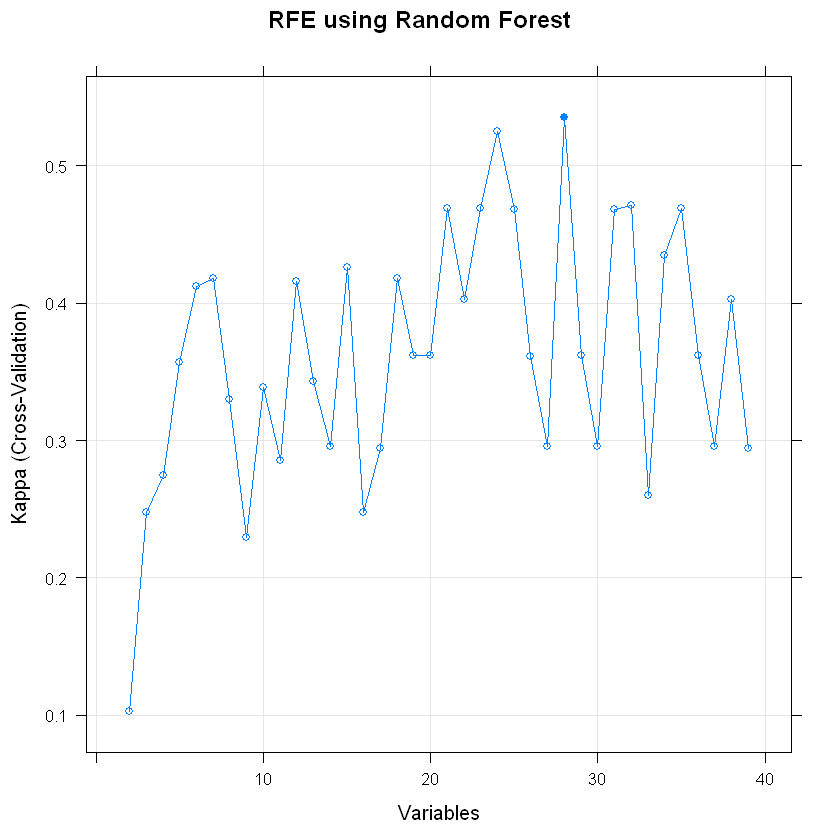

In [20]:
#define the control using a random forest selection function
#install.packages("caret")
#require(caret)
#install.packages("e1071")
require(e1071)
#install.packages("randomForest")
require(randomForest)
set.seed(1)
control <- rfeControl(functions=rfFuncs, method="cv", number=5)
set.seed(2)
results <- rfe(data_train[,2:40], data_train[[1]], sizes=c(2:40),rfeControl=control,metric="Kappa") 
print(results) 
#list the chosen features
predictors(results) 
#plot the results
plot(results, type=c("g", "o"),main="RFE using Random Forest")

## RF a partir do subset definido pelo RFE-RF

In [22]:
subset_rfe<- as.vector(predictors(results))
subset_rfe<- c("Caidor",subset_rfe)
length(subset_rfe)

[1] 29

Caidor,medicaçao_tipo_cardiovascular,Berg,Anticoagulante_classif,quantidade_total_de_medicação,DT_Sec,Freq_atividade,Criterio_AHA,IMC,Fluencia_verbal,...,DT_numero_animais,medicação_tipo_saude,Trilhas_b,Dinamometria,Tempo_doença,FES_I,DVC_primaria,Nivel_social,Nivel_educacional,Doenca_Respi
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,...,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>
sim,Beta + Anti_Coag,11,não,7,26,3x,c,26,17,...,8,cardio+mental,11,7,5,10,insuficiencia,b,6,sim
não,Beta + Anti_Coag,11,não,5,22,2x,b,39,5,...,5,cardio+mental,43,21,5,4,insuficiencia,c,3,não
sim,Beta + Anti_Coag + Diu,9,sim,7,32,sedentario,c,33,10,...,5,cardio+mental,29,2,3,1,arritmia,b,2,não
sim,Beta,11,sim,1,27,3x,c,6,9,...,6,cardio+mental,30,14,4,6,arritmia,b,8,não
não,Beta,12,sim,4,23,2x,b,25,8,...,5,cardiovascular,34,9,8,1,arritmia,b,1,não
não,Beta,12,não,5,8,2x,b,2,10,...,3,cardio+mental,27,4,2,4,arritmia,c,4,não


Random Forest 

38 samples
28 predictors
 2 classes: 'sim', 'não' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 31, 30, 31, 30, 30 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.6821429  0.2762191
  23    0.6821429  0.2762191
  44    0.6821429  0.2762191

Kappa was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 28.95%
Confusion matrix:
    sim não class.error
sim   7   7   0.5000000
não   4  20   0.1666667

rf variable importance

  only 20 most important variables shown (out of 44)

                              Overall
DT_Sec                         100.00
Trilhas_A                       69.35
Berg                            66.59
Vo2_maximo_avaliado             66.41
Tempo_doença                    66.35
STS                             60.93
Dinamometria                    58.09
Trilhas_b                       57.62
Fluencia_verbal                 54.70
TUG_sec                         53.06
Anticoagulante_classifsim       48.51
Nivel_educacional               48.06
quantidade_total_de_medicação   46.38
IMC                             44.75
MMSE                            40.32
FES_I                           40.30
Criterio_AHAc                   39.45
DT_numero_animais               36.32
Freq_atividade3x                34.34
medicação_tipo_mentalnão        29.41

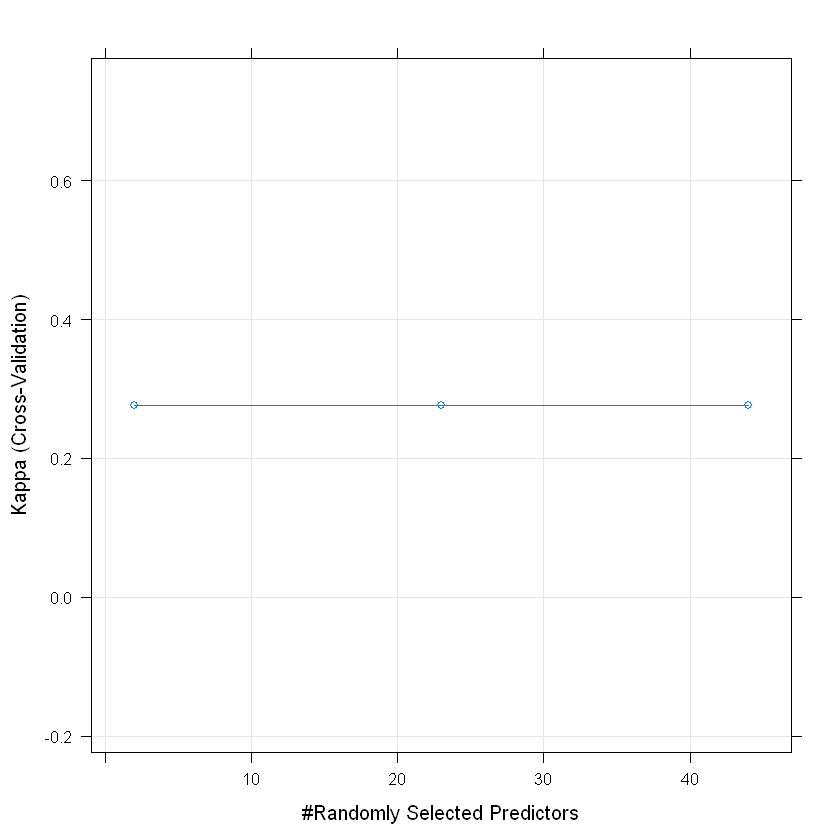

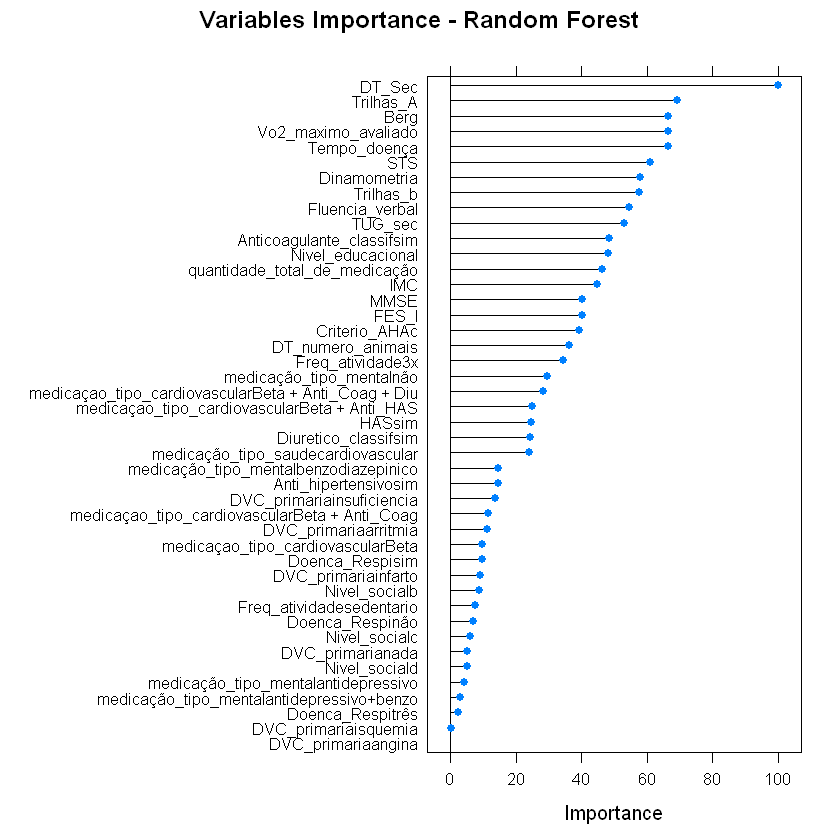

In [23]:

data_train_RFE_RF<- data_train[,subset_rfe]
data_test_RFE_RF<- data_test[,subset_rfe]
head(data_train_RFE_RF)
set.seed(3)
RFmodel=train(Caidor~.,data=data_train_RFE_RF,method='rf',metric=ifelse(is.factor(data_train_RFE_RF$Caidor),"Kappa","RMSE"),trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
RFmodel
plot(RFmodel)
RFmodel$finalModel 
varImp(RFmodel)
plot(varImp(RFmodel),main="Variables Importance - Random Forest")

Confusion Matrix and Statistics

     RF_prediction
      sim não
  sim   2   3
  não   0   9
                                         
               Accuracy : 0.7857         
                 95% CI : (0.492, 0.9534)
    No Information Rate : 0.8571         
    P-Value [Acc > NIR] : 0.8719         
                                         
                  Kappa : 0.4615         
                                         
 Mcnemar's Test P-Value : 0.2482         
                                         
            Sensitivity : 1.0000         
            Specificity : 0.7500         
         Pos Pred Value : 0.4000         
         Neg Pred Value : 1.0000         
             Prevalence : 0.1429         
         Detection Rate : 0.1429         
   Detection Prevalence : 0.3571         
      Balanced Accuracy : 0.8750         
                                         
       'Positive' Class : sim            
                                         

Sensitivity          Specificity       Pos Pred Value 
           1.0000000            0.7500000            0.4000000 
      Neg Pred Value            Precision               Recall 
           1.0000000            0.4000000            1.0000000 
                  F1           Prevalence       Detection Rate 
           0.5714286            0.1428571            0.1428571 
Detection Prevalence    Balanced Accuracy 
           0.3571429            0.8750000

rf variable importance

  only 20 most important variables shown (out of 44)

                              Overall
DT_Sec                         100.00
Trilhas_A                       69.35
Berg                            66.59
Vo2_maximo_avaliado             66.41
Tempo_doença                    66.35
STS                             60.93
Dinamometria                    58.09
Trilhas_b                       57.62
Fluencia_verbal                 54.70
TUG_sec                         53.06
Anticoagulante_classifsim       48.51
Nivel_educacional               48.06
quantidade_total_de_medicação   46.38
IMC                             44.75
MMSE                            40.32
FES_I                           40.30
Criterio_AHAc                   39.45
DT_numero_animais               36.32
Freq_atividade3x                34.34
medicação_tipo_mentalnão        29.41

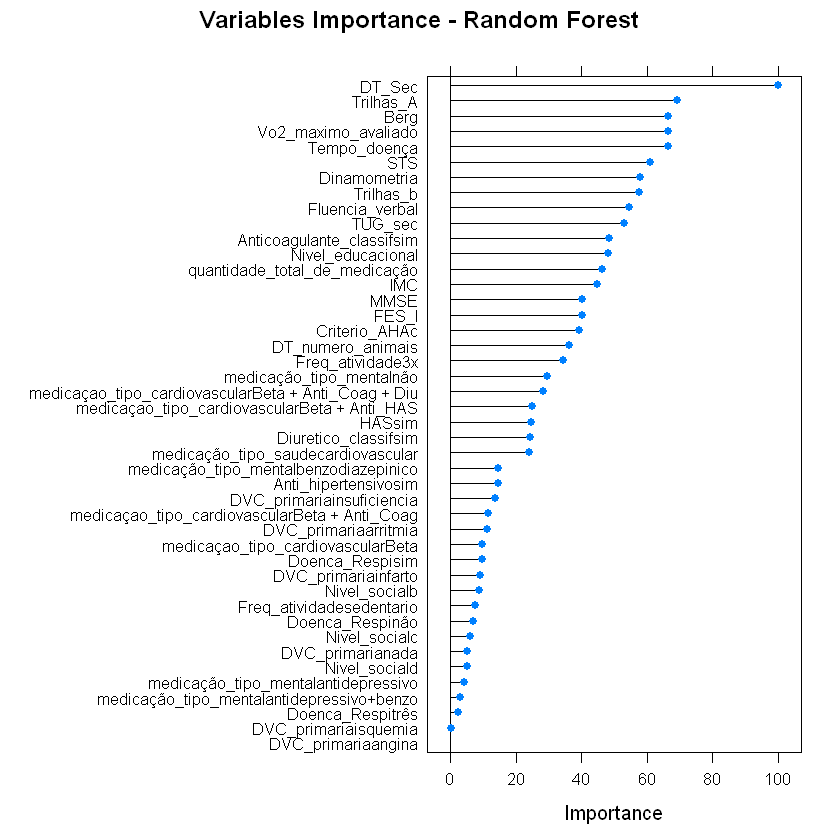

In [24]:
RF_prediction<- predict(RFmodel,data_test_RFE_RF)
confusionMatrix(table(data_test_RFE_RF$Caidor,RF_prediction)) 
confusionMatrix(table(data_test_RFE_RF$Caidor,RF_prediction))$byClass 
varImp(RFmodel)
plot(varImp(RFmodel),main="Variables Importance - Random Forest")

# Definição do melhor threshold (*mudar a estratégia para o f-beta/ROC*)

In [26]:
f1 <- function(ths){
    
  diff <- abs(ths$Sensitivity - ths$Specificity)
  indexOfMin = match(min(diff), diff)
  return(ths[indexOfMin, "prob_threshold"])
}

f2 <- function(ths){
    desv <- function(x){
      sd(c(unname(x["Sensitivity"]), unname(x["Specificity"])))
    }
    avg <- (ths$Sensitivity + ths$Specificity)/2
    deviation <- apply(ths, desv, MARGIN=1)
    metric <- avg - deviation
    indexOfMin = match(max(metric), metric)
    return(ths[indexOfMin, "prob_threshold"])
}

In [25]:
#install.packages("here")
require(here)
#source(here('Modules','modules.R'))
#set.seed(2)
#model <- fit_model_thresholder(
 #   model_method="rf",
  #  model_metric="Kappa",
   # trControl_func = trainControl(method = "cv", search="grid",  classProbs=TRUE, savePredictions=TRUE),
    #train_data = data_train_RFE_RF,
    #test_data=data_test_RFE_RF,
    #yname="Caidor",
    #length = 15,
    #best_th = f2)

#print(model$matrix)

Loading required package: here

Warning message:
"package 'here' was built under R version 3.6.3"
here() starts at c:/Users/usernote/Documents/Analises_Heitor



# RFE-RF (*sem dividir em amostra de treino e de teste*)


Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy   Kappa AccuracySD KappaSD Selected
         2   0.6325 0.21690    0.18101  0.3614         
         3   0.6770 0.29623    0.13271  0.3007        *
         4   0.6533 0.23101    0.04761  0.1402         
         5   0.6533 0.25093    0.07999  0.1908         
         6   0.6529 0.21368    0.11007  0.2642         
         7   0.6311 0.16083    0.09015  0.1810         
         8   0.6347 0.16840    0.10193  0.2332         
         9   0.6529 0.21987    0.11007  0.2478         
        10   0.6347 0.16947    0.12051  0.2735         
        11   0.6711 0.27028    0.09425  0.2040         
        12   0.6166 0.11302    0.14224  0.3464         
        13   0.5984 0.06154    0.12982  0.3150         
        14   0.6388 0.17954    0.10511  0.2491         
        15   0.6166 0.11800    0.10940  0.2476         
        16   0.6570 0.23101    0.112

[1] "Berg"                          "medicaçao_tipo_cardiovascular"
[3] "Vo2_maximo_avaliado"

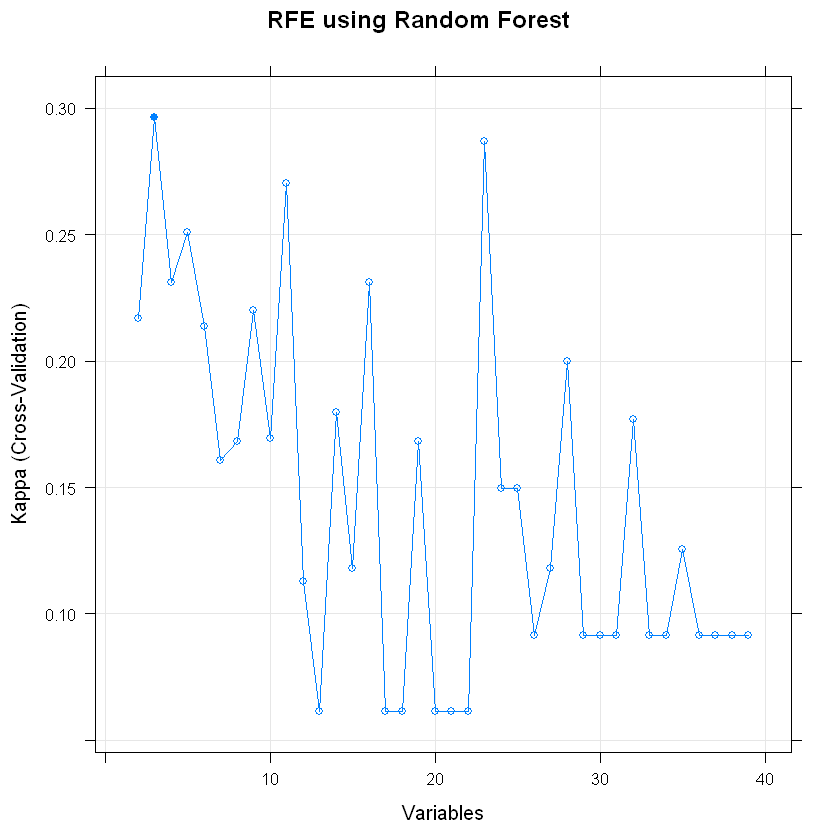

In [27]:
#define the control using a random forest selection function
#install.packages("caret")
#require(caret)
#install.packages("e1071")
#require(e1071)
#install.packages("randomForest")
#require(randomForest)
set.seed(12)
control2 <- rfeControl(functions=rfFuncs, method="cv", number=5)
set.seed(22)
results2 <- rfe(BD[,2:40], BD[[1]], sizes=c(2:40),rfeControl=control2,metric="Kappa") 
print(results2) 
#list the chosen features
predictors(results2) 
#plot the results
plot(results2, type=c("g", "o"),main="RFE using Random Forest")

Caidor,Berg,medicaçao_tipo_cardiovascular,Vo2_maximo_avaliado
<fct>,<dbl>,<fct>,<dbl>
sim,11,Beta + Anti_Coag,20
não,11,Beta + Anti_Coag,3
sim,9,Beta + Anti_Coag + Diu,5
sim,11,Beta,25
não,12,Beta,7
não,12,Beta,26


Random Forest 

52 samples
 3 predictor
 2 classes: 'sim', 'não' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 41, 42, 42, 42, 41 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.6527273  0.2434151
  4     0.6345455  0.1930108
  6     0.6163636  0.1365580

Kappa was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 28.85%
Confusion matrix:
    sim não class.error
sim  11   8   0.4210526
não   7  26   0.2121212

rf variable importance

                                                    Overall
Vo2_maximo_avaliado                                  100.00
Berg                                                  79.93
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu   31.62
medicaçao_tipo_cardiovascularBeta + Anti_HAS          16.46
medicaçao_tipo_cardiovascularBeta + Anti_Coag          9.48
medicaçao_tipo_cardiovascularBeta                      0.00

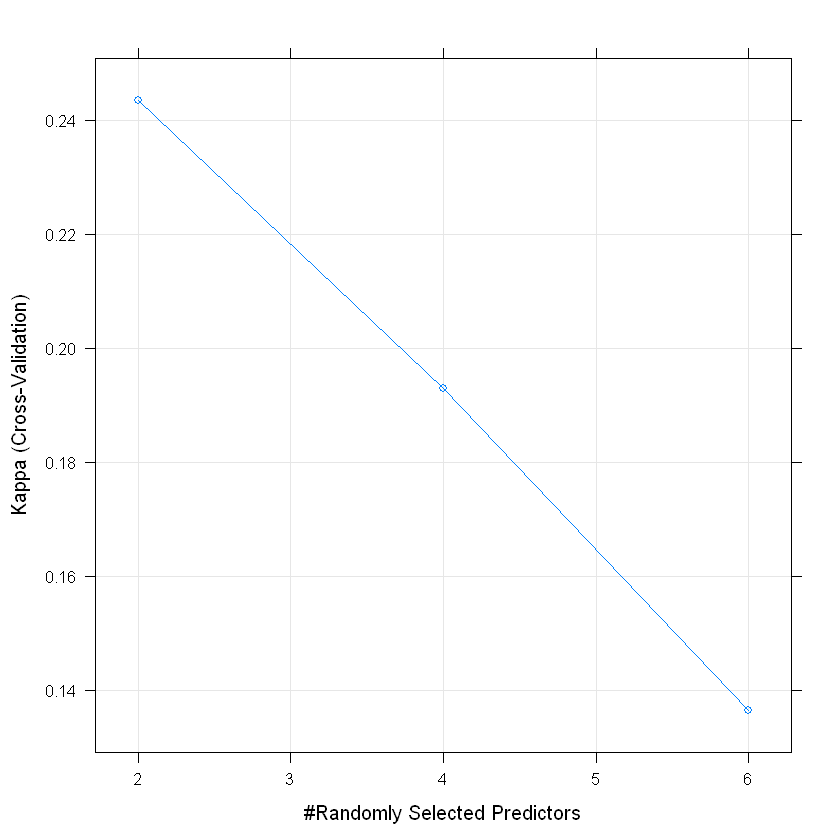

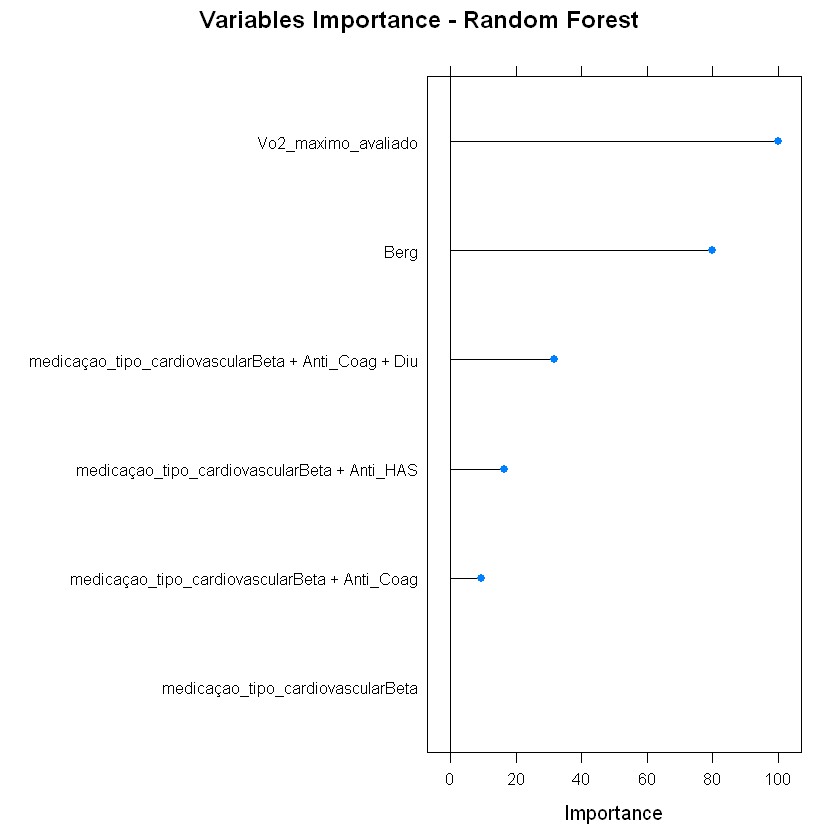

In [28]:
BD_RF_rfe<- BD[,c("Caidor","Berg",
                               "medicaçao_tipo_cardiovascular","Vo2_maximo_avaliado")]
head(BD_RF_rfe)
set.seed(42)
RFmodel2=train(Caidor~.,data=BD_RF_rfe,method='rf',metric=ifelse(is.factor(BD_RF_rfe$Caidor),"Kappa","RMSE"),trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
RFmodel2 
plot(RFmodel2)
RFmodel2$finalModel  
varImp(RFmodel2)
plot(varImp(RFmodel2),main="Variables Importance - Random Forest")

# Otimizando a métrica de interesse usando *f-beta* e *ROC" (*sem a divisão do dataset em treino e teste*)

## F-beta

In [30]:
# Objetivo: diminuir os Falsos Negativos (indivíduos classificados, de forma errada, como não caidor)
# Aumentar o valor de Beta (>1 - prioriza o recall)

#install.packages("Metrics")
#require(Metrics)
#Como calcular fbeta de um modelo de rf:
#obs<- RFmodel2$pred[,2]
#obs<- as.numeric(obs)
#pred<- RFmodel2$pred[,1]
#pred<- as.numeric(pred)
#fbeta_score(obs,pred,beta= seq(1,2,0.1))

Loading required package: Metrics

Warning message:
"package 'Metrics' was built under R version 3.6.3"

Attaching package: 'Metrics'


The following object is masked _by_ '.GlobalEnv':

    f1


The following objects are masked from 'package:caret':

    precision, recall




[1] 1.513043 1.514295 1.515420 1.516426 1.517323 1.518121 1.518831 1.519463
 [9] 1.520026 1.520529 1.520979

In [48]:
#install.packages("MLmetrics")
#require(MLmetrics)

#F-BETA
fbeta <- function (data, lev = NULL, model = NULL) {
  fb_val <- FBeta_Score(data$obs, data$pred, beta=1.5)
  c(FB = fb_val)
}
set.seed(3)
RF_fbeta <- train(Caidor~., 
                     data = BD_RF_rfe,
                     method = "rf",
                     metric = "FB",
                     trControl = trainControl(method='cv',number=5,savePredictions=TRUE,search="grid",summaryFunction=fbeta))
RF_fbeta
RF_fbeta$finalModel

#Não está dando o resultado esperado (redução dos FN)

Random Forest 

52 samples
 3 predictor
 2 classes: 'sim', 'não' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 43, 41, 42, 41, 41 
Resampling results across tuning parameters:

  mtry  FB       
  2     0.5921429
  4     0.5386905
  6     0.5386905

FB was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 28.85%
Confusion matrix:
    sim não class.error
sim  11   8   0.4210526
não   7  26   0.2121212

rf variable importance

                                                    Overall
Vo2_maximo_avaliado                                  100.00
Berg                                                  92.34
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu   29.32
medicaçao_tipo_cardiovascularBeta + Anti_HAS          12.72
medicaçao_tipo_cardiovascularBeta + Anti_Coag         10.38
medicaçao_tipo_cardiovascularBeta                      0.00

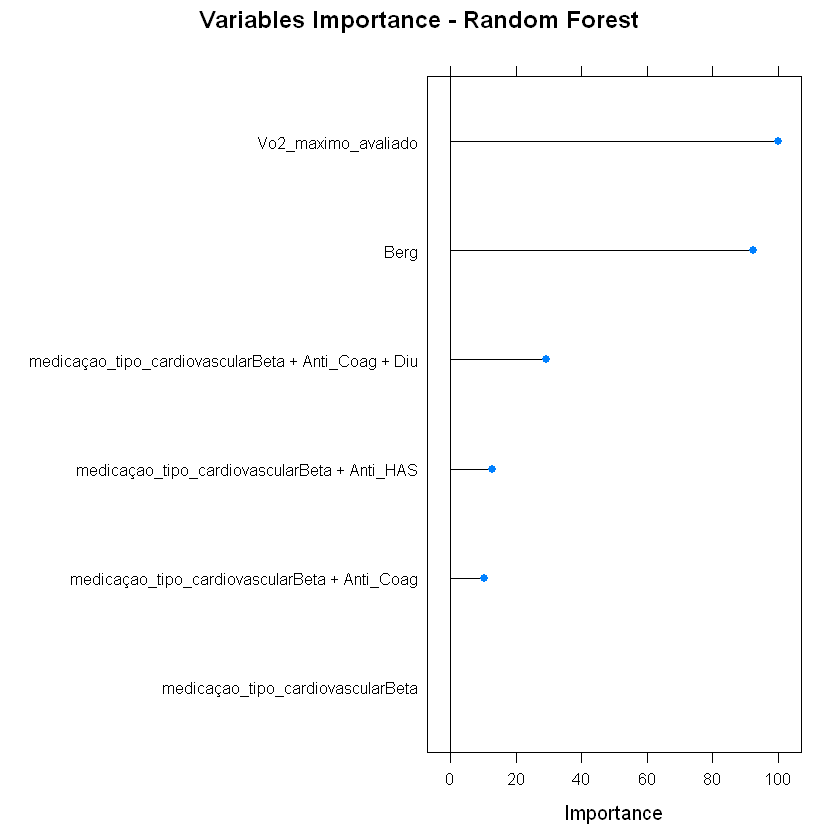

In [49]:
varImp(RF_fbeta)
plot(varImp(RF_fbeta),main="Variables Importance - Random Forest")

## ROC

In [50]:
#twoClassSummary (Sensibilidade, especificidade e AUC ROC)
fitControl <- trainControl(method = "cv",
                           number = 5,
                           savePredictions=TRUE,
                           search="grid",
                           # estimar probabilidades das classes
                           classProbs = TRUE,
                           # avaliar performance utilizando função a seguir
                           summaryFunction = twoClassSummary)

set.seed(13)
ROC_rfmodel <- train(Caidor ~ ., data = BD_RF_rfe, 
                 method = "rf", 
                 trControl = fitControl, 
                 # especificando qual métrica deseja otimizar
                 metric = "ROC")
ROC_rfmodel
ROC_rfmodel$finalModel

Random Forest 

52 samples
 3 predictor
 2 classes: 'sim', 'não' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 41, 42, 42, 42, 41 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
  2     0.8375000  0.5833333  0.8142857
  4     0.8190476  0.5833333  0.8142857
  6     0.7821429  0.5333333  0.7857143

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 26.92%
Confusion matrix:
    sim não class.error
sim  11   8   0.4210526
não   6  27   0.1818182

rf variable importance

                                                    Overall
Vo2_maximo_avaliado                                 100.000
Berg                                                 85.319
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu  26.499
medicaçao_tipo_cardiovascularBeta + Anti_HAS         13.208
medicaçao_tipo_cardiovascularBeta + Anti_Coag         5.148
medicaçao_tipo_cardiovascularBeta                     0.000

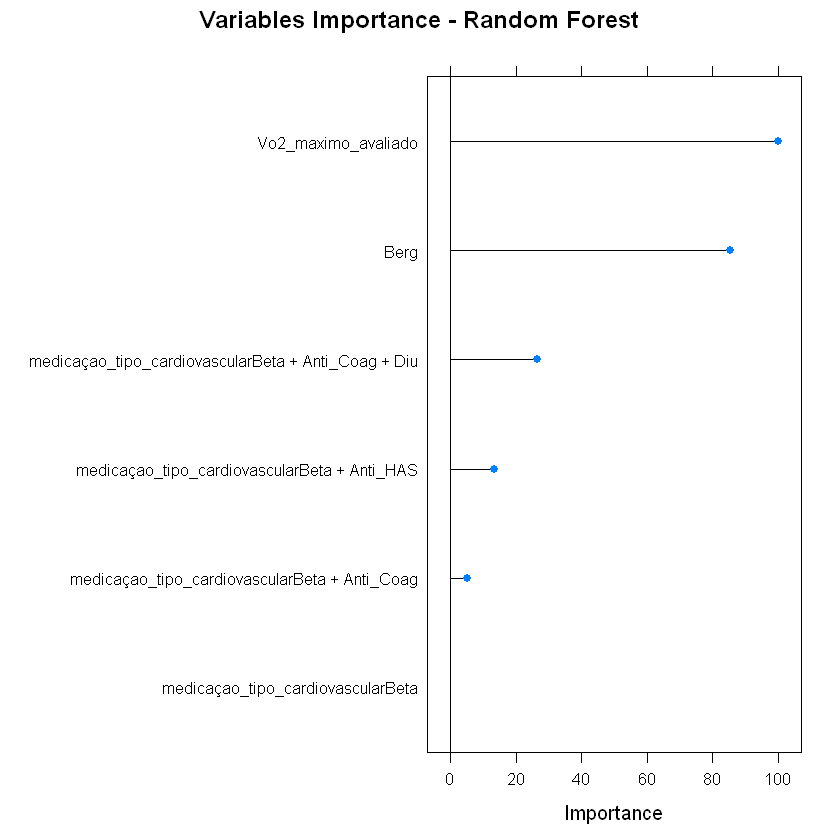

In [51]:
varImp(ROC_rfmodel)
plot(varImp(ROC_rfmodel),main="Variables Importance - Random Forest")

Setting levels: control = sim, case = não

Setting direction: controls < cases




Call:
roc.default(response = RFmodel2$pred[, 2], predictor = y, plot = T)

Data: y in 57 controls (RFmodel2$pred[, 2] sim) < 99 cases (RFmodel2$pred[, 2] não).
Area under the curve: 0.6005

Setting levels: control = sim, case = não

Setting direction: controls < cases



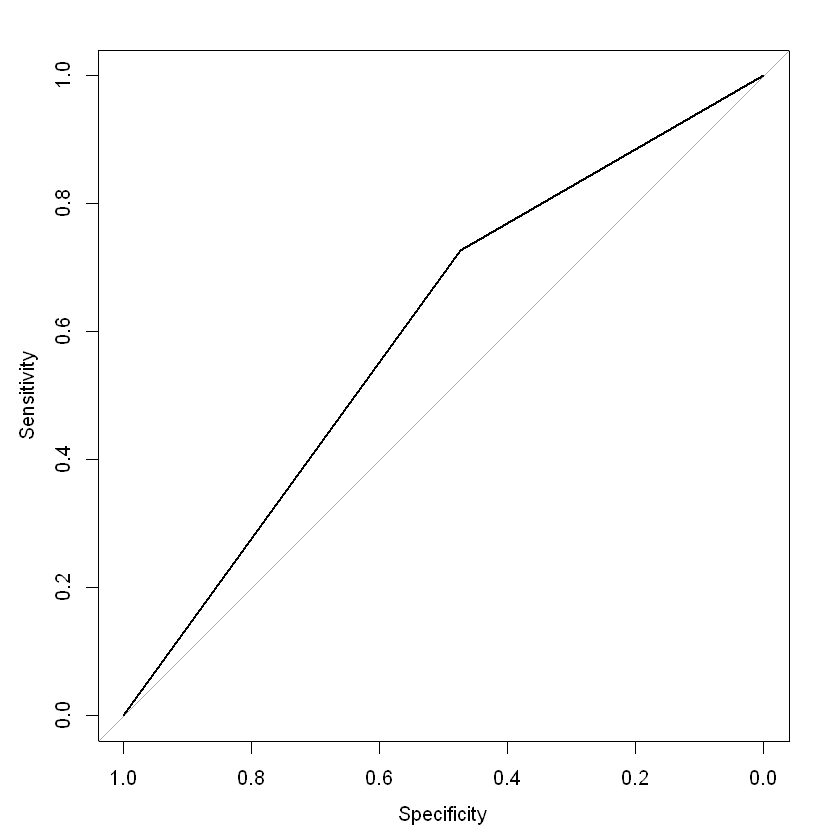


Call:
roc.default(response = RF_fbeta$pred[, 2], predictor = y, plot = T)

Data: y in 57 controls (RF_fbeta$pred[, 2] sim) < 99 cases (RF_fbeta$pred[, 2] não).
Area under the curve: 0.4623


	DeLong's test for two ROC curves

data:  roc_rf and roc_fbeta
D = 2.4626, df = 309.76, p-value = 0.01434
alternative hypothesis: true difference in AUC is not equal to 0
sample estimates:
AUC of roc1 AUC of roc2 
  0.6004785   0.4622541 


Setting levels: control = sim, case = não

Setting direction: controls < cases



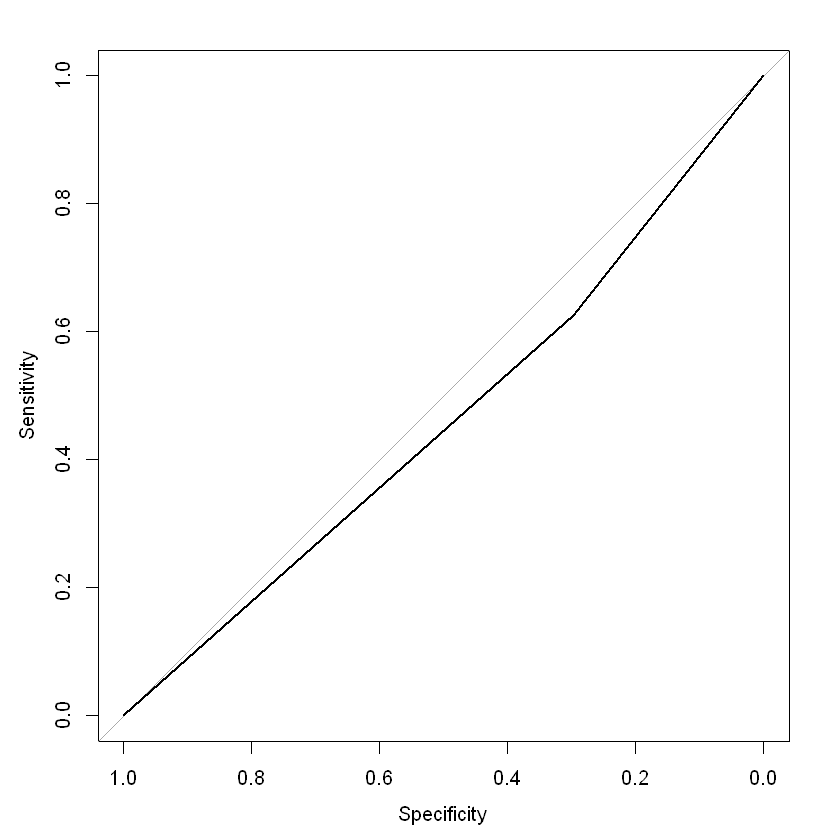


Call:
roc.default(response = ROC_rfmodel$pred[, 2], predictor = y2,     plot = T)

Data: y2 in 57 controls (ROC_rfmodel$pred[, 2] sim) < 99 cases (ROC_rfmodel$pred[, 2] não).
Area under the curve: 0.588


	DeLong's test for two ROC curves

data:  roc_rf and auc_roc
D = 0.22043, df = 309.98, p-value = 0.8257
alternative hypothesis: true difference in AUC is not equal to 0
sample estimates:
AUC of roc1 AUC of roc2 
  0.6004785   0.5879851 


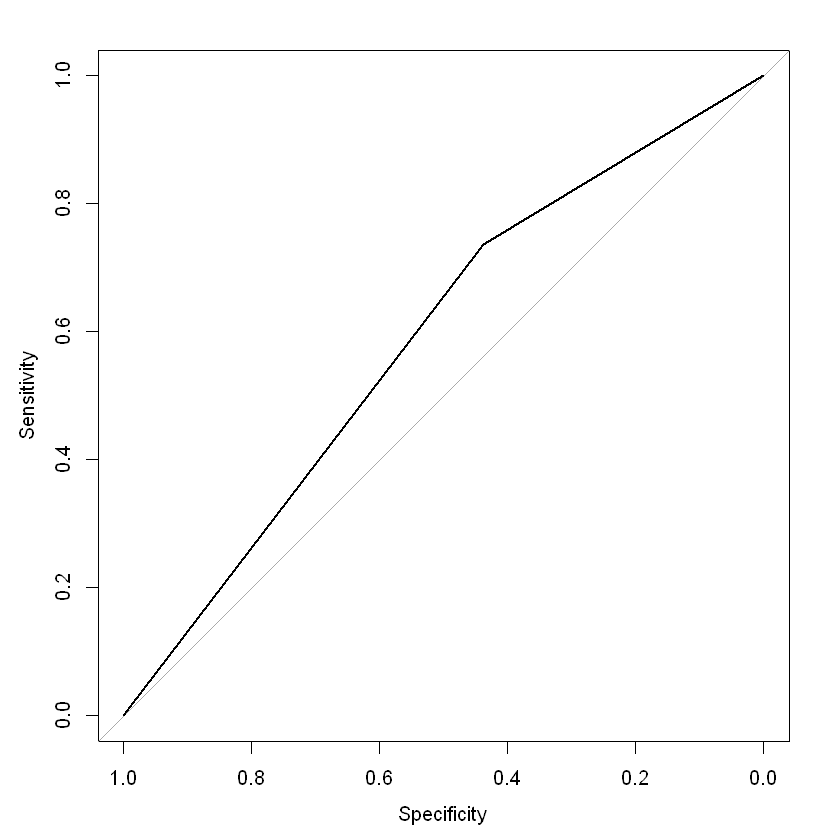

In [52]:
#attributes(ROC_rfmodel)
#install.packages("pROC")
require(pROC)

y<- as.numeric(RFmodel2$pred[,1])
roc_rf<- roc(RFmodel2$pred[,2], y, plot=T)
roc_rf

y2<- as.numeric(RF_fbeta$pred[,1])
roc_fbeta<- roc(RF_fbeta$pred[,2], y, plot=T)
roc_fbeta

roc.test(roc_rf,roc_fbeta)

y3<- as.numeric(ROC_rfmodel$pred[,1])
auc_roc<- roc(ROC_rfmodel$pred[,2],y2,plot=T)
auc_roc

roc.test(roc_rf,auc_roc)

# Regressão Logística (Berg e DT_Sec) e (Berg, medicaçao_tipo_cardiovascular e Vo2_maximo_avaliado)

In [44]:
set.seed(321)
logistic_model<- glm(Caidor ~ Berg + DT_Sec ,data=BD_RF_rfe, family = 'binomial')
summary(logistic_model)
#Razão de chances
OR<- exp(coef(logistic_model)) 
OR


Call:
glm(formula = Caidor ~ Berg + DT_Sec, family = "binomial", data = BD_RF_rfe)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9824  -0.5623  -0.4192   0.5344   2.2659  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  4.53994    2.84032   1.598  0.10996   
Berg        -0.61721    0.23242  -2.656  0.00792 **
DT_Sec       0.09966    0.04339   2.297  0.02163 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 68.271  on 51  degrees of freedom
Residual deviance: 44.011  on 49  degrees of freedom
AIC: 50.011

Number of Fisher Scoring iterations: 5


(Intercept)        Berg      DT_Sec 
 93.6851132   0.5394479   1.1047910

In [45]:
set.seed(123)
logistic_model2<- glm(Caidor~Berg+medicaçao_tipo_cardiovascular+Vo2_maximo_avaliado,data=BD_RF_rfe, family = 'binomial')
summary(logistic_model2)
#Razão de chances
OR2<- exp(coef(logistic_model2)) 
OR2


Call:
glm(formula = Caidor ~ Berg + medicaçao_tipo_cardiovascular + 
    Vo2_maximo_avaliado, family = "binomial", data = BD_RF_rfe)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8202  -0.4861   0.1116   0.6564   2.6084  

Coefficients:
                                                      Estimate Std. Error
(Intercept)                                          9.706e+00  2.710e+03
Berg                                                 6.746e-01  2.713e-01
medicaçao_tipo_cardiovascularBeta                   -1.633e+01  2.710e+03
medicaçao_tipo_cardiovascularBeta + Anti_Coag       -1.772e+01  2.710e+03
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu -1.779e+01  2.710e+03
medicaçao_tipo_cardiovascularBeta + Anti_HAS        -1.326e+01  2.710e+03
Vo2_maximo_avaliado                                 -4.035e-03  4.328e-02
                                                    z value Pr(>|z|)  
(Intercept)                                           0.004   0.9971  
Ber

(Intercept) 
                                       1.641485e+04 
                                               Berg 
                                       1.963249e+00 
                  medicaçao_tipo_cardiovascularBeta 
                                       8.105584e-08 
      medicaçao_tipo_cardiovascularBeta + Anti_Coag 
                                       2.022035e-08 
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu 
                                       1.882253e-08 
       medicaçao_tipo_cardiovascularBeta + Anti_HAS 
                                       1.740320e-06 
                                Vo2_maximo_avaliado 
                                       9.959734e-01